In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd

In [191]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line:\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 
    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

In [192]:
def exponential(x, A, B, C): return A*np.exp(B*(x)) + C
def fit_exponential(xs, ys, p0=(1,1,1), params=False):
    popt, pcov = curve_fit(f=exponential, xdata=xs, ydata=ys)
    xFit = np.arange(min(xs)-0.1,max(xs)+0.1, 2e-4)
    A, B, C = popt
    err = np.diag(pcov)**0.5
    if params:
        A,B,C = params
        err = np.array(params)*0.08
    label = f'Best-fit parameters for\n      '+  r'$y=A e^{Bx} + C$' + f'\nA = {A:.3f}' + r' $\pm$ ' + f'{err[0]:.3f}\n' \
            + r'B' + f' = {B:.3f}' + r' $\pm$ ' + f'{err[1]:.3f}\n' \
            + r'C' + f' = {C:.3f}' + r' $\pm$ ' + f'{err[2]:.3f}\n'
    return xFit, exponential(xFit, A, B, C), label

# range of $\beta$ particles

In [193]:
rho=2.71e2 # g/cm^3 * 10 cm/mm

18.82777777777778


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best-fit parameters for
      $y=A e^{Bx} + C$
A = 39.770 $\pm$ 3.182
B = -0.016 $\pm$ -0.001
C = -2.224 $\pm$ -0.178



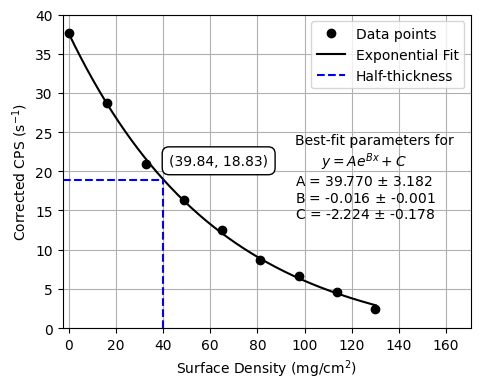

In [201]:
data = pd.read_excel('data.xlsx', sheet_name='range')
y = data['Tl-204 CPS'][:9]
x = data['Al thickness (mm)'][:9]*rho # g/cm2

plt.figure(figsize=(5,4))
xx, yy, label = fit_exponential(x, y, params=(3.977e+01, -1.573e-02,-2.224e+00))

plt.plot(x, y, 'ko', label='Data points')
plt.plot(xx, yy, '-k', label='Exponential Fit')
plt.xlim(-0.01*rho, 0.63*rho)
plt.ylim(-0.01, 40)
plt.ylabel(r'Corrected CPS (s$^{-1}$)')
plt.xlabel(r'Surface Density (mg/cm$^2$)')

x1 = 0.147*rho
y1 = np.max(y)/2

plt.gca().hlines(y=(np.max(y))/2, xmin=-0.01*rho, xmax=x1, linestyle='--', color='b')
plt.gca().vlines(x=x1, ymin=0, ymax=(np.max(y))/2, linestyle='--', color='b', label='Half-thickness')

plt.text(x1+.01*rho, y1+2, f'({x1:.2f}, {y1:.2f})', color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(0.6, 0.4, label, transform=plt.gcf().transFigure)

print(np.max(y)/2)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('images/Tl.eps')
print(label)
t1 = x1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


30.488333333333333


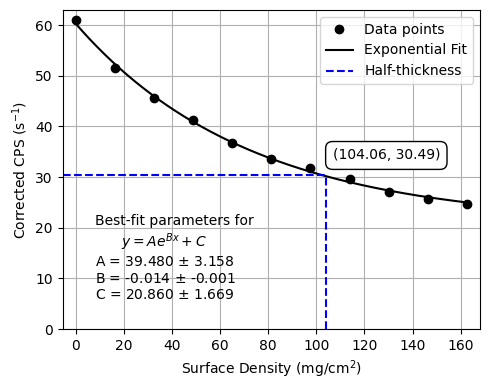

In [200]:
data = pd.read_excel('data.xlsx', sheet_name='range')
y = data['Sr-90 CPS'][:11]
x = data['Al thickness (mm)'][:11]*rho # g/cm2

plt.figure(figsize=(5,4))
xx, yy, label = fit_exponential(x, y, params=(3.948e+01 , -1.387e-02,2.086e+01 ))

plt.plot(x, y, 'ko', label='Data points')
plt.plot(xx, yy, '-k', label='Exponential Fit')
plt.xlim(-0.02*rho, 0.62*rho)
plt.ylim(-0.01, 63)
plt.ylabel(r'Corrected CPS (s$^{-1}$)')
plt.xlabel(r'Surface Density (mg/cm$^2$)')
plt.grid()

x1 = 0.384*rho
y1 = np.max(y)/2

plt.gca().hlines(y=(np.max(y))/2, xmin=-0.02*rho, xmax=x1, linestyle='--', color='b')
plt.gca().vlines(x=x1, ymin=0, ymax=(np.max(y))/2, linestyle='--', color='b', label='Half-thickness')

plt.text(x1+.01*rho, y1+3, f'({x1:.2f}, {30.49:.2f})', color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(0.2, 0.2, label, transform=plt.gcf().transFigure)
plt.legend()
plt.tight_layout()
plt.savefig('images/Sr.eps')
print(np.max(y)/2)
t2 = x1

## calculation

In [187]:
R2 = 0.30728*t2/t1
err_R2 = R2*rho*0.01*np.sqrt((1/t1)**2 + (1/t2)**2)
E0 = (R2+0.09)/0.52
err_E0 = E0*err_R2/R2
print(f'R2: {R2:.3f} \pm {err_R2:.3f}')
print(f'E0: {E0:.3f} \pm {err_E0:.3f}')

R2: 0.826 \pm 0.060
E0: 1.761 \pm 0.128


# back scattering

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


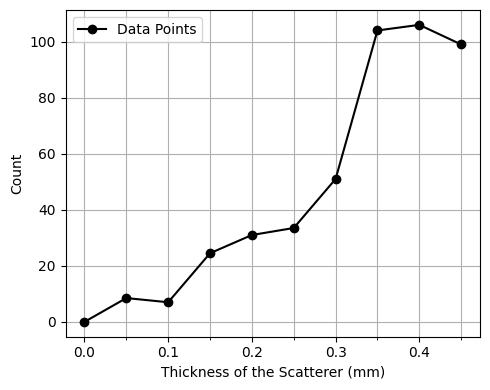

In [176]:
data = pd.read_excel('data.xlsx', sheet_name='back-scattering')
plt.figure(figsize=(5,4))
y = data['Net Count']
x = data['Thickness (mm)']
plt.plot(x, y, '-ko', label='Data Points')
plt.ylabel('Count')
plt.xlabel('Thickness of the Scatterer (mm)')
plt.gca().set_xticks(np.arange(0,0.46, 0.05), minor=True)
plt.grid(which='minor')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('images/backscat.eps')